In [9]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

# The goal of Elimination is to produce an upper triangular matrix

In [10]:
def matrix_elimination(A, b):
    '''
    This function is for gaussian elimination. A matrix M of nxn size and a vector 
    of nx1 size is passed into the function. This function works for any nxn matrix.
    '''
    
    # Does a horizontal stack with matrix A an vector b
    M = np.hstack((A, b.reshape((b.shape[0],1))))

    for i in range(0, len(M)):
        if i==len(M)-1:
            break
        # Gets the pivot
        pivot = M[i][i]
        
        for j in range(i+1, len(M)):
            
            # Computes for the multiplier
            multiplier = M[j][i] / pivot
            M[j] = multiplier*M[i] - M[j]
            
            if M[j][j]<0:
                M[j] = -1 * M[j]
                
    A = M[:, 0:len(A)]
    b = M[:, len(A)]
    
    # Returns a right triangular coefficient matrix and the b vector
    return A, b

# 2x2 case

In [11]:
A = np.array([[1, -2],
              [3,  2]])

b = np.array([1,11])

matrix_elimination(A, b)

(array([[ 1, -2],
        [ 0,  8]]), array([1, 8]))

# Visualizing the problem

<IPython.core.display.Javascript object>


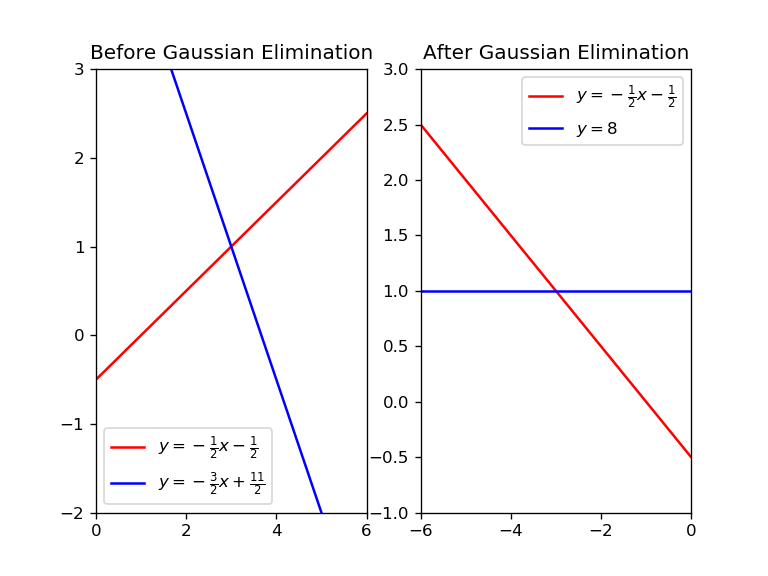

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'After Gaussian Elimination')

In [21]:
plt.subplot(1,2,1)

# Before gaussian elimination
ax1 = plt.subplot(1, 2, 1)

x = np.linspace(-1,6)
y1 = (x/2) - 0.5
y2 = (11/2) - (3*x/2)

ax1.plot(x, y1, color='r', label=r'$y=-\frac{1}{2}x -\frac{1}{2}$')
ax1.plot(x, y2, color='b', label=r'$y=-\frac{3}{2}x +\frac{11}{2}$')
ax1.set_xlim(0,6)
ax1.set_ylim(-2,3)
ax1.legend()
ax1.set_title("Before Gaussian Elimination")

# Gaussian elimination
ax2=plt.subplot(1, 2, 2)

x = np.linspace(-6,0)
y12 = (-x/2) - 0.5
y22 = [1]*len(x)

ax2.plot(x, y12, color='r', label=r'$y=-\frac{1}{2}x-\frac{1}{2}$')
ax2.plot(x, y22, color='b', label=r'$y=8$')
ax2.set_xlim(-6,0)
ax2.set_ylim(-1,3)
ax2.legend()
ax2.set_title("After Gaussian Elimination")

# 3x3 case

In [15]:
A = np.array([[2, 4, -2],
              [4, 9, -3],
              [-2,-3, 7]])

b = np.array([2, 8, 10])

matrix_elimination(A, b)

(array([[ 2,  4, -2],
        [ 0,  1,  1],
        [ 0,  0,  4]]), array([2, 4, 8]))

# Random matrices

In [16]:
A = np.random.rand(2,2)
b = np.random.rand(2)

matrix_elimination(A, b)

(array([[ 0.85285237,  0.2824966 ],
        [-0.        ,  0.3373405 ]]), array([ 0.80253841, -0.39765532]))

# Cases where elimination fails

# I. No solution

$x-2y=1$<br>
$3x-6y=11$

In [22]:
x = np.linspace(-3, 3)

y1 = x/2 - 0.5
y2 = x/2 - (11/6)

<IPython.core.display.Javascript object>


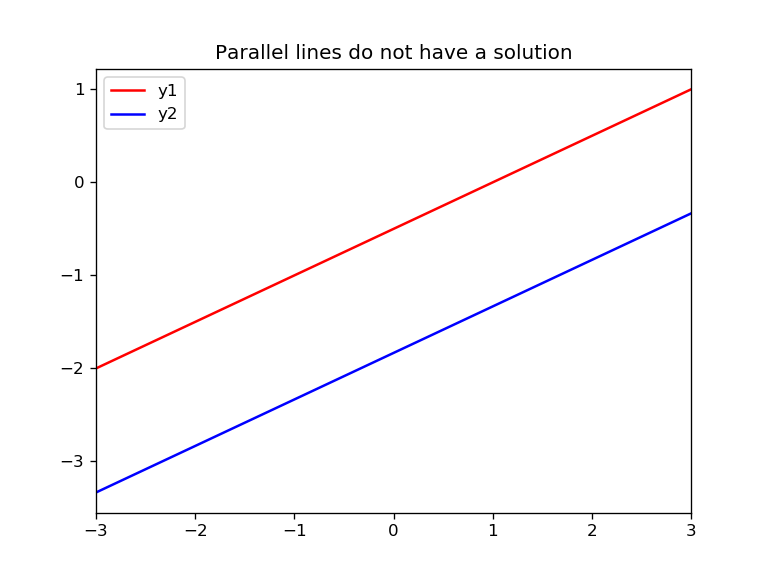

In [23]:
plt.figure()

plt.plot(x, y1, color='r', label='y1')
plt.plot(x, y2, color='b', label='y2')
plt.xlim(-3,3)
plt.title('Parallel lines do not have a solution')
plt.legend()

### Testing it out

In [30]:
A = np.array([[1, -2],
              [3, -6]])

b = np.array([1, 11])

matrix_elimination(A, b) # Our program produces [0, 0] in the second row

(array([[ 1, -2],
        [ 0,  0]]), array([ 1, -8]))

### II. Infinitely many solutions

$x-2y=1$<br>
$3x-6y=3$

<IPython.core.display.Javascript object>


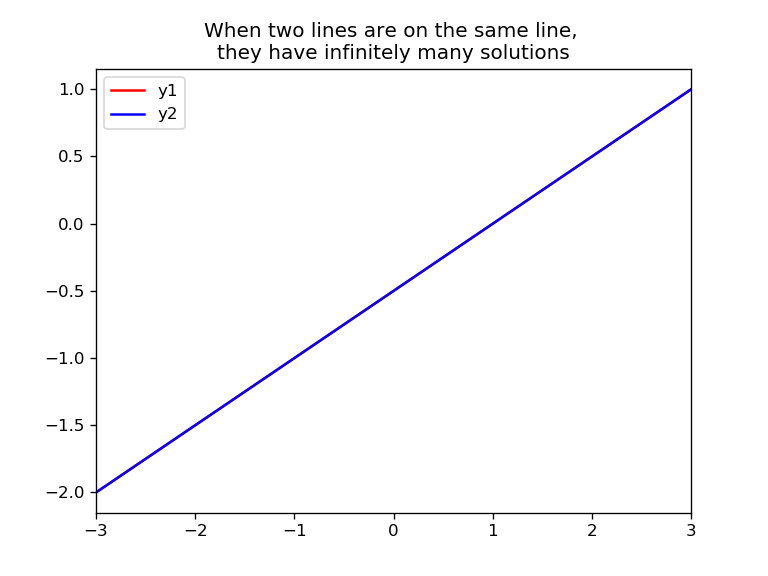

In [27]:
x = np.linspace(-3, 3)

y1 = x/2 - 0.5
y2 = x/2 - 0.5

plt.figure()

plt.plot(x, y1, color='r', label='y1')
plt.plot(x, y2, color='b', label='y2')
plt.xlim(-3,3)
plt.title('When two lines are on the same line, \nthey have infinitely many solutions')
plt.legend()

### Testing it out

In [32]:
A = np.array([[1, -2],
              [3, -6]])

b = np.array([1, 3])

matrix_elimination(A, b) # Our program produces [0, 0] in the second row

(array([[ 1, -2],
        [ 0,  0]]), array([1, 0]))